In [33]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Define the ticker symbol for Netflix (NFLX)
ticker = "NFLX"

# Define the start and end dates for the data
start_date = "2018-06-29"
end_date = "2023-06-29"

# Retrieve the stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Print the retrieved data
print(data.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-29  399.190002  401.329987  390.549988  391.429993  391.429993   
2018-07-02  385.450012  398.380005  380.000000  398.179993  398.179993   
2018-07-03  399.489990  399.980011  389.500000  390.519989  390.519989   
2018-07-05  393.799988  399.239990  390.859985  398.390015  398.390015   
2018-07-06  397.450012  408.649994  395.519989  408.250000  408.250000   

             Volume  
Date                 
2018-06-29  9252500  
2018-07-02  8142500  
2018-07-03  5280300  
2018-07-05  8448900  
2018-07-06  8629600  


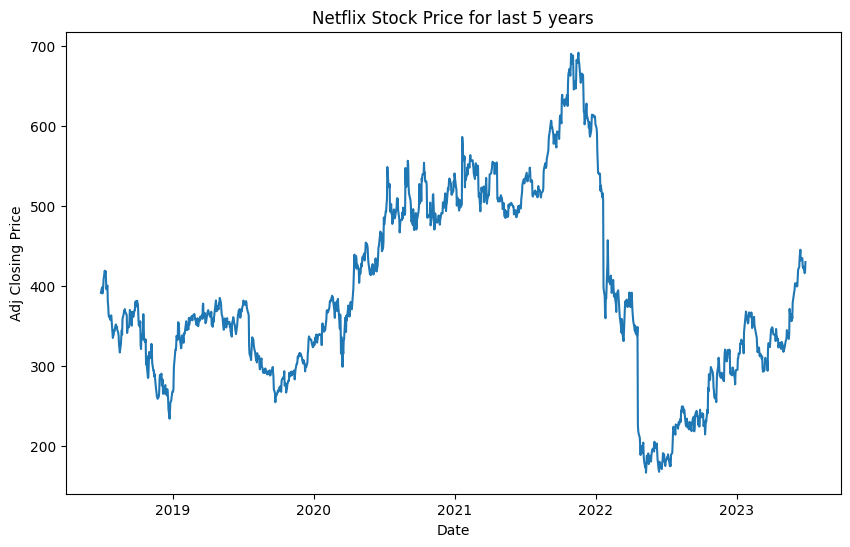

In [29]:
# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Closing Price')
plt.title('Netflix Stock Price for last 5 years')
plt.show()

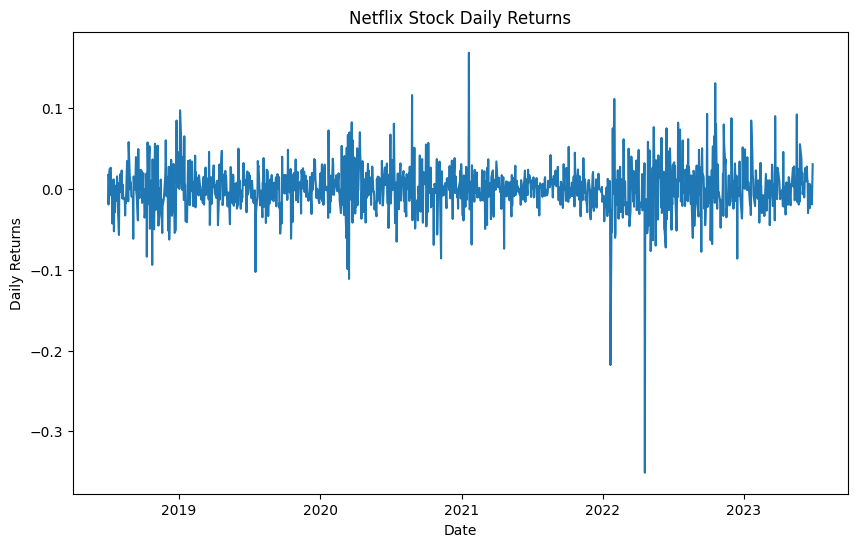

In [30]:
# Plot the daily percentage change in closing price
daily_returns = data['Adj Close'].pct_change()
plt.figure(figsize=(10, 6))
plt.plot(daily_returns)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Netflix Stock Daily Returns')
plt.show()

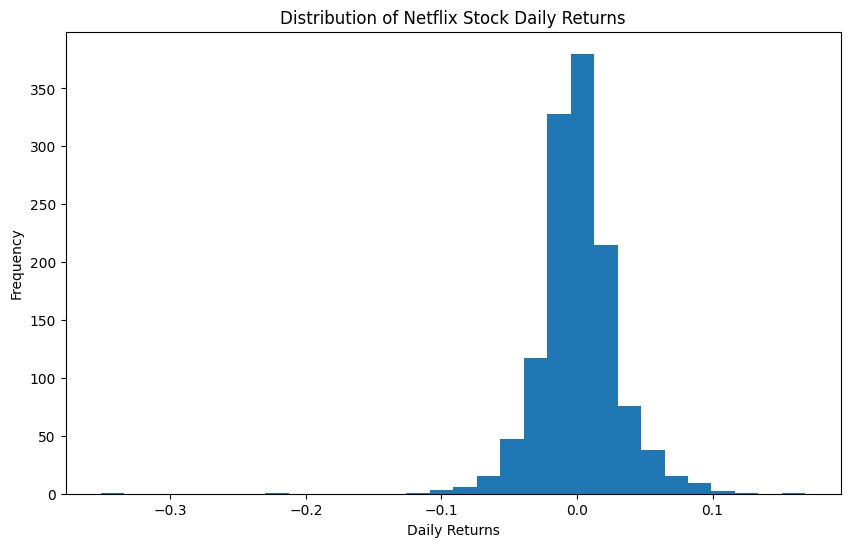

In [31]:
# Plot a histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(daily_returns.dropna(), bins=30)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Netflix Stock Daily Returns')
plt.show()

,Open,High,Low,Close,Adj Close,Volume,vol,year
Open,1.000000,0.998824,0.998868,0.997410,0.997410,-0.361287,-0.014091,0.014038
High,0.998824,1.000000,0.998629,0.998871,0.998871,-0.349454,0.011974,0.015017
Low,0.998868,0.998629,1.000000,0.998817,0.998817,-0.373806,0.012919,0.014986
Close,0.997410,0.998871,0.998817,1.000000,1.000000,-0.359287,0.040018,0.014950
Adj Close,0.997410,0.998871,0.998817,1.000000,1.000000,-0.359287,0.040018,0.014950
Volume,-0.361287,-0.349454,-0.373806,-0.359287,-0.359287,1.000000,-0.146303,-0.062260
vol,-0.014091,0.011974,0.012919,0.040018,0.040018,-0.146303,1.000000,0.009869
year,0.014038,0.015017,0.014986,0.014950,0.014950,-0.062260,0.009869,1.000000


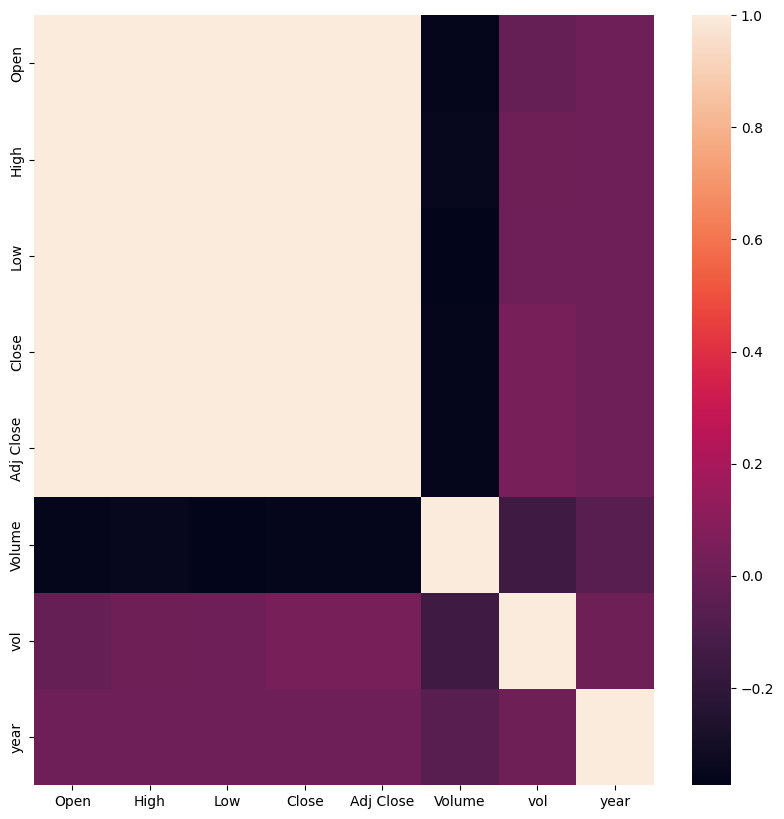

In [45]:
# Check for factors responsible in overall volume trade
fig, ax = plt.subplots (figsize = (10, 10))
corr_matrix = data.corr() # Perform default correlation using Pearson Method 

# Plot the correlation matrix in a heatmap to understand better
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)
corr_matrix

In [40]:
data.index

DatetimeIndex(['2018-06-29', '2018-07-02', '2018-07-03', '2018-07-05',
               '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13',
               ...
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-20',
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26',
               '2023-06-27', '2023-06-28'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

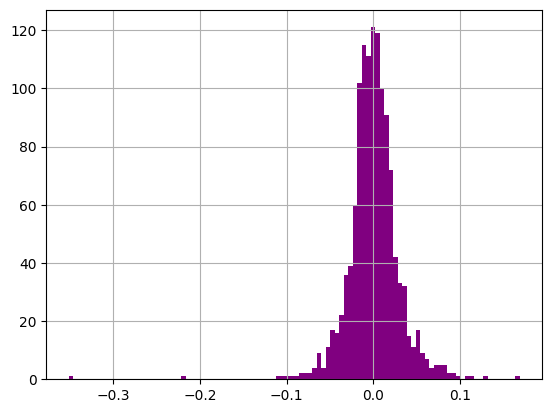

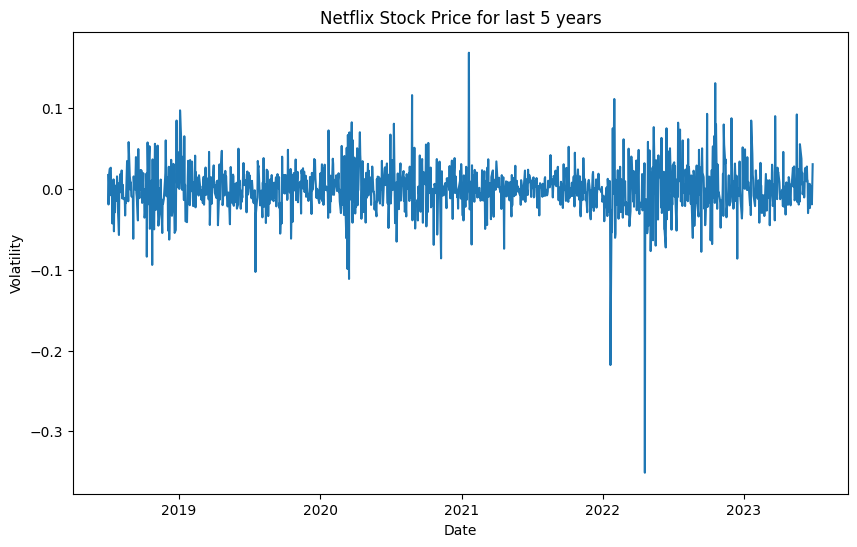

In [46]:

# Calculate rolling volatility (standard deviation of daily returns)
data['vol'] = (data['Adj Close']/data['Adj Close'].shift(1)) - 1
data['vol'].hist(bins=100, color='purple');
# Plot the rolling volatility over time
plt.figure(figsize=(10, 6))
plt.plot(data['vol'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Netflix Stock Price for last 5 years')
plt.show()

From the above graph, Netlfix share is pretty volatile over the last 5 years.